In [219]:
from data_hygiene import read_mongo
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


ImportError: cannot import name clean_data

In [ ]:
# db.us_closed_petitions.find({petition_id: {$lt: 236494}}).count()

In [209]:
data = read_mongo("changeorg", "us_closed_petitions", {"petition_id": {"$lt": 236494}})

In [142]:
data.head().T

,0,1,2,3,4
_id,5780937fd9ccb32891d1cbb7,5780937fd9ccb32891d1cbb9,5780937fd9ccb32891d1cbba,57809380d9ccb32891d1cbbc,57809380d9ccb32891d1cbbd
ask,"Freeze all of BP's assets, before it is too late","Dont mix Catholic Mass, with Gay Bashing",Week 65–Ask FIVE more congress representative ...,Nada's Plight for Justice,"Dear Russia, Please Don't Cut Support for Traf..."
calculated_goal,5000,500,500,500,500
category,Environment,Gay Rights,Immigrant Rights,End Sex Trafficking,Human Trafficking
created_at,2010-05-31T09:14:21Z,2010-05-31T10:20:59Z,2010-05-31T10:37:39Z,2010-05-31T13:03:53Z,2010-05-31T13:04:22Z
creator_city,West Chester,Hinckley,San Francisco,Niangua,Rowlett
creator_country,US,US,US,US,US
creator_description,I am a spinal injury patient. I need to have ...,"I am so liberal, I believe its a given - ever...",,,I am an abolitionist fighting against modern d...
creator_display_name,Christopher David Moore,jan Lightfootlane,Amos Lim,T Baker,John Burger AbolitionistJB
creator_fb_permissions,0,0,0,0,0


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9423 entries, 0 to 9422
Data columns (total 67 columns):
_id                                9423 non-null object
ask                                9422 non-null object
calculated_goal                    9422 non-null float64
category                           7671 non-null object
created_at                         9423 non-null object
creator_city                       8625 non-null object
creator_country                    9422 non-null object
creator_description                4008 non-null object
creator_display_name               8394 non-null object
creator_fb_permissions             8394 non-null float64
creator_first_name                 8394 non-null object
creator_has_address                1028 non-null object
creator_has_contact_email          1028 non-null object
creator_has_fb_page                1028 non-null object
creator_has_slug                   9422 non-null object
creator_has_twitter                1028 non-null ob

### number of victories and verified victories

In [147]:
data[data.status == "victory"]["status"].count()

131

In [149]:
data[data.is_verified_victory == True]["status"].count()

119

In [150]:
data[data.status == "closed"]["status"].count()

9292

In [221]:
data.shape

(9423, 67)

### Getting length of description

In [151]:
data["description"] = data["description"].replace(np.nan,'', regex=True)

In [152]:
data['description_len']=data["description"].apply(len)

### Getting length of creator description

In [153]:
data["creator_description"] = data["creator_description"].replace(np.nan,'', regex=True)

In [154]:
data["creator_description_len"] = data["creator_description"].apply(len)

### Getting length of title

In [155]:
data["title"] = data["title"].replace(np.nan,'', regex=True)

In [156]:
data["title_len"] = data["title"].apply(len)

### Has image?

In [157]:
data["has_image"] = data["image_url"] != np.nan

### Number of tags

In [166]:
def get_length_tags(x):
    try:
        return  len(x)
    except:
         return  0
    

In [167]:
data["num_tags"] = data["tags"].apply(get_length_tags)

### Creator has twitter

In [169]:
data["creator_has_twitter"] =  data["creator_has_twitter"].replace(np.nan,False)

### Number of targets

In [170]:
data["num_targets"] = data["targets"].apply(len)


### Length letter

In [171]:
data["letter_body_len"] = data["letter_body"].apply(len)

### Convert to datetime

In [172]:
data["created_at"] = pd.to_datetime(data["created_at"])

In [173]:
data["end_at"] = pd.to_datetime(data["end_at"])

In [174]:
data['time_range'] = (data["end_at"] - data["created_at"]).apply(lambda x: x.days)

## Some histograms

In [175]:
filtered_data = data[["petition_id", "status", "category", "creator_state", \
      "creator_country", "title_len", "description_len", "creator_description_len", \
     "goal", "calculated_goal", "is_verified_victory", "num_past_victories", \
     "created_at", "end_at", "has_image", "num_tags", "has_video", \
     "num_targets", "creator_type", "letter_body_len", "creator_has_website", \
    "creator_has_twitter", "original_locale", "time_range"]]

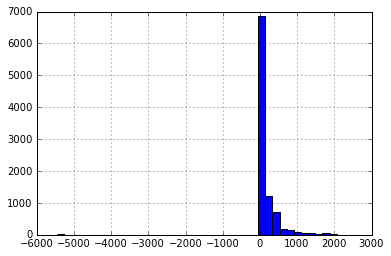

In [176]:
filtered_data["time_range"].hist(bins= 40)

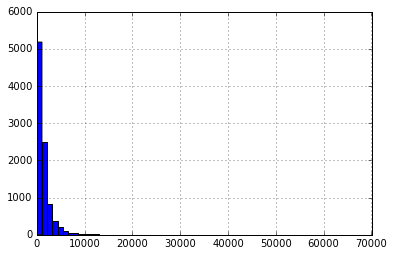

In [177]:
filtered_data["description_len"].hist(bins= 60)

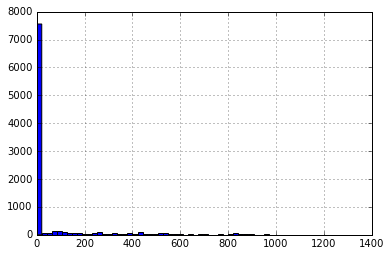

In [178]:
filtered_data["creator_description_len"].hist(bins= 60)

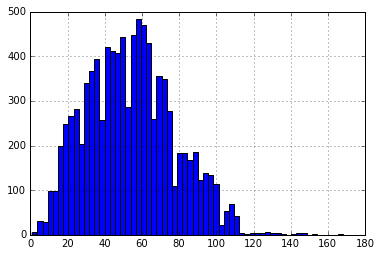

In [179]:
filtered_data["title_len"].hist(bins= 60)

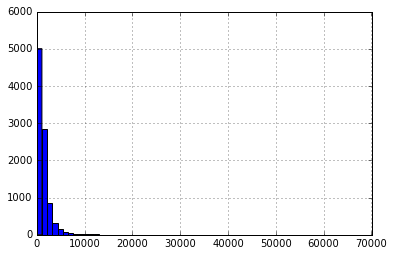

In [180]:
filtered_data["letter_body_len"].hist(bins= 60)

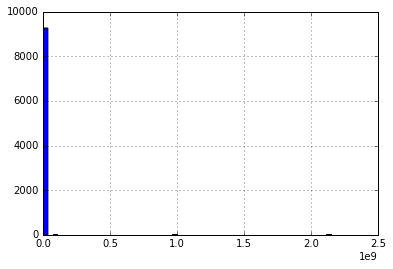

In [181]:
filtered_data["goal"].hist(bins= 60)

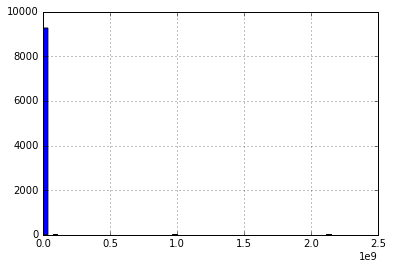

In [182]:
filtered_data["calculated_goal"].hist(bins= 60)

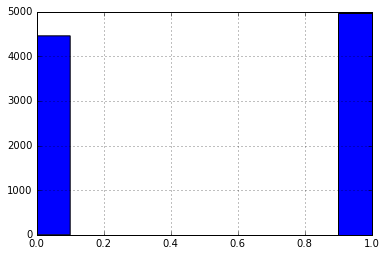

In [183]:
filtered_data["creator_has_website"].hist()

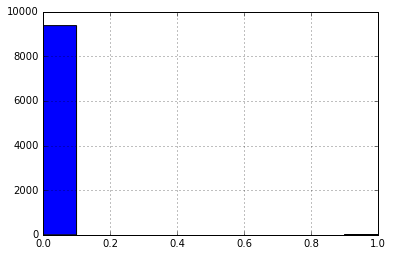

In [184]:
filtered_data["creator_has_twitter"].hist()

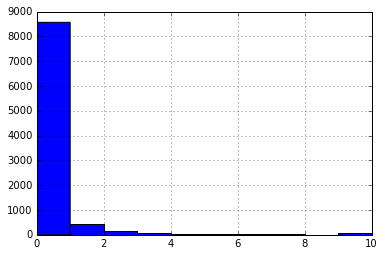

In [185]:
filtered_data["num_past_victories"].hist(bins= 10)

## scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b962e50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13dde2cd0>]], dtype=object)

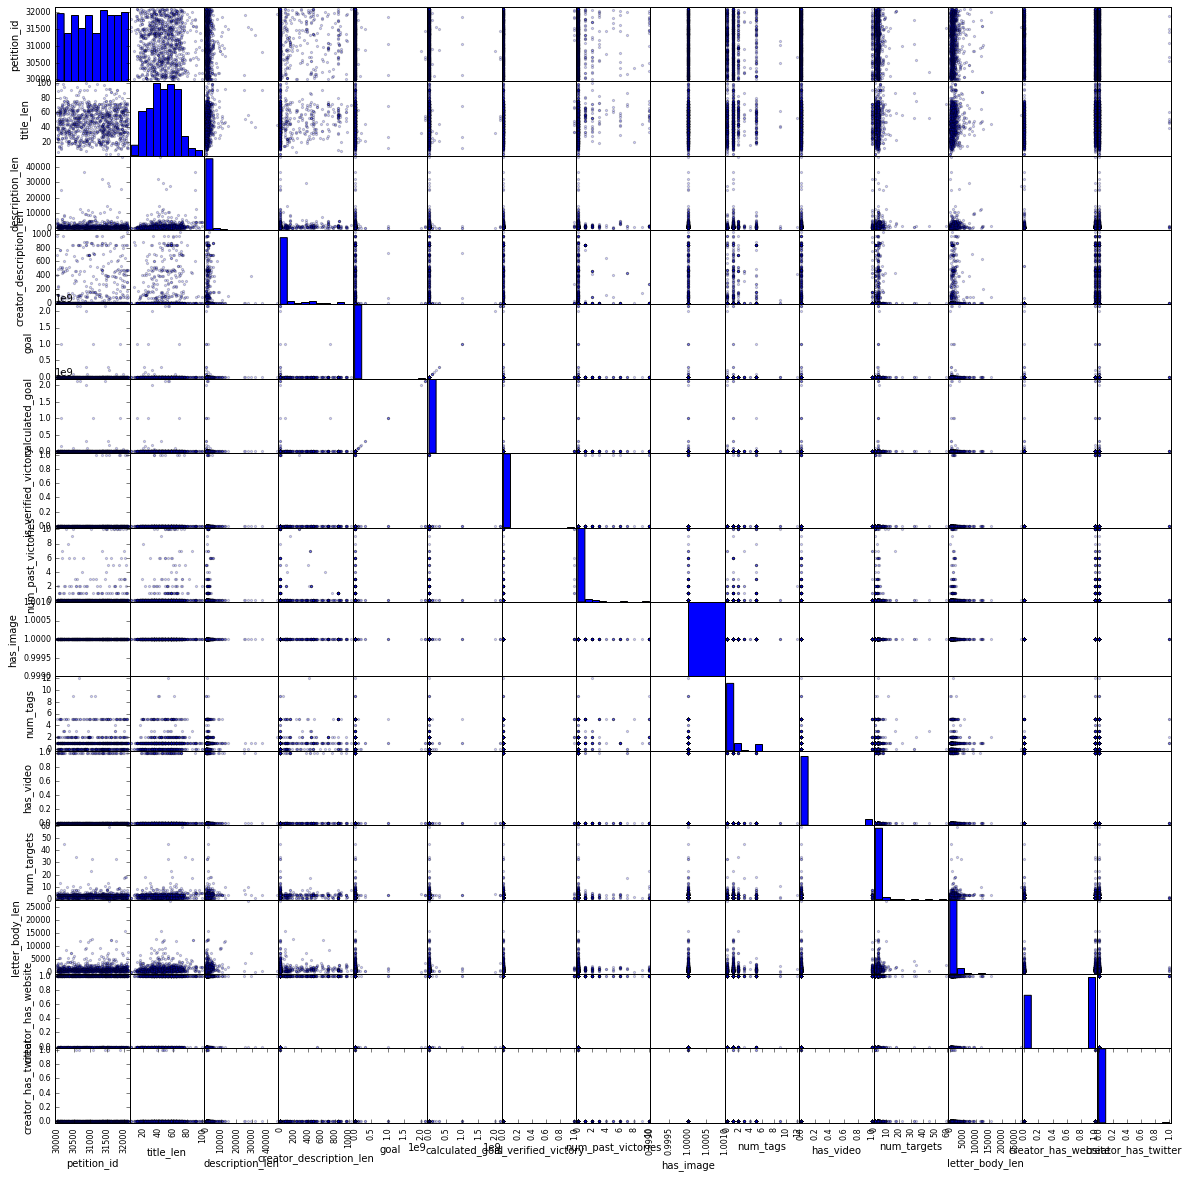

In [119]:
pd.scatter_matrix(filtered_data, alpha=0.2, figsize=(20, 20))

In [186]:
filtered_data[filtered_data["status"] == "victory"].T

,521,585,668,720,858,870,955,981,1228,1477,...,8930,8987,8990,9118,9122,9175,9240,9281,9286,9373
petition_id,31171,31331,31469,31546,31838,31871,32028,32082,32559,33056,...,203770,208337,208410,216951,217213,221322,224944,227998,228081,233225
status,victory,victory,victory,victory,victory,victory,victory,victory,victory,victory,...,victory,victory,victory,victory,victory,victory,victory,victory,victory,victory
category,Animals,Gay Rights,Criminal Justice,Human Trafficking,Animals,Animals,Criminal Justice,Animals,Human Trafficking,Women's Rights,...,Gay Rights,Human Rights,Immigrant Rights,Animals,Immigrant Rights,Animals,Immigrant Rights,Animals,Human Rights,Education
creator_state,None,NY,IL,HI,MO,MI,NC,DC,CA,MN,...,NH,FL,PA,MI,AL,CA,MO,None,OR,NJ
creator_country,US,US,US,US,US,US,US,US,US,US,...,US,US,US,US,US,US,US,TH,US,US
title_len,46,34,75,66,68,49,43,34,37,92,...,66,38,78,67,66,67,65,89,85,39
description_len,2192,1143,1357,779,697,1184,3919,513,3027,3879,...,2075,8137,908,882,1436,2120,3586,5168,904,1312
creator_description_len,0,16,271,0,0,0,0,0,0,126,...,537,0,0,0,0,0,0,545,0,0
goal,5000,2000,200,3000,5000,2500,1000,35000,3000,12010000,...,150000,10000,2500,1500,1000,75000,1000,1500,2000,15000
calculated_goal,5000,2000,200,3000,5000,2500,1000,35000,3000,1.201e+07,...,150000,10000,2500,1500,1000,75000,1000,1500,2000,15000


## Trying Logistic Regression

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [207]:
log_data = data[["status", "title_len", "description_len", "creator_description_len", \
     "goal", "calculated_goal", "num_past_victories", \
     "has_image", "num_tags", "has_video", \
     "num_targets", "letter_body_len", "creator_has_website", \
    "creator_has_twitter", "time_range"]]

In [200]:
y = log_data.pop("status")

In [201]:
X= log_data

In [206]:
X.head()

,title_len,description_len,creator_description_len,goal,calculated_goal,is_verified_victory,num_past_victories,has_image,num_tags,has_video,num_targets,letter_body_len,creator_has_website,creator_has_twitter,time_range
0,48,781,962,5000,5000.0,False,0.0,True,1,False,3,1626,True,False,90
1,40,1042,395,500,500.0,False,0.0,True,1,False,1,1334,True,False,90
2,99,4068,0,500,500.0,False,0.0,True,0,False,5,1923,True,False,163
3,25,6203,0,500,500.0,False,0.0,True,1,False,1,2657,True,False,640
4,61,3223,698,500,500.0,False,0.0,True,2,False,5,2483,True,False,90


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values)

In [203]:
model = LogisticRegression()

In [204]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [205]:
model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [211]:
pd.to_datetime(np.nan)

NaT

In [ ]:
data = read_mongo("changeorg", "us_closed_petitions", {"petition_id": {"$lt": 236494}})
clean_data = clean_data(data)